In [32]:
import torch
import tqdm
import numpy as np
from sklearn.manifold import TSNE
from torchvision import datasets, models, transforms
from vgg_face import *
from FAUDataset import *
import matplotlib.pyplot as plt

c:\Users\Yuan\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Yuan\anaconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [33]:
with open('D:/GitHub/FAU_Dataset/code/results_r66/results.txt') as f:
    lines = f.readlines()

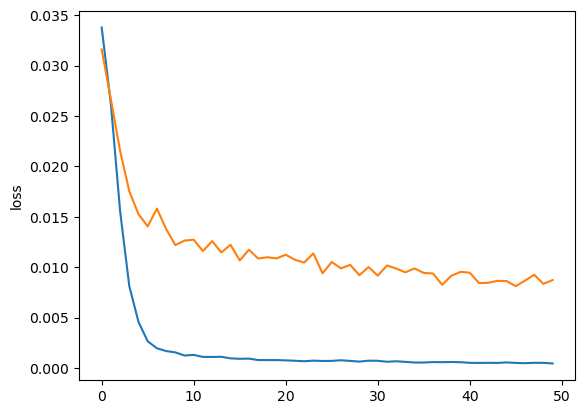

In [35]:
train_loss_list = []
for i in range(len(lines)):
    if 'train_loss' in lines[i]:
        train_loss_list.append(float(lines[i][lines[i].index(':')+1:]))

test_loss_list = []
for i in range(len(lines)):
    if 'test_loss' in lines[i]:
        test_loss_list.append(float(lines[i][lines[i].index(':')+1:]))

plt.plot(train_loss_list)
plt.plot(test_loss_list)
plt.ylabel('loss')
plt.show()